In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from yellowbrick.regressor import PredictionError, ManualAlphaSelection
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import FeatureImportances

In [101]:
df = pd.read_csv("Advertising.csv")

In [102]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [104]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

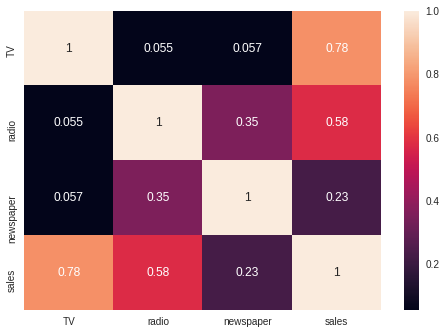

In [105]:
sns.heatmap(df.corr(), annot=True)

In [106]:
X = df.drop(["sales"], axis=1)

In [107]:
y = df.sales

In [108]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(X_train)  # Our model has learned how to scale the dataset.

StandardScaler()

In [112]:
X_train = scaler.transform(X_train)

In [113]:
X_test = scaler.transform(X_test)

In [114]:
a = pd.DataFrame(X_train, columns=X.columns)

In [115]:
a.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [116]:
# We could also scale it like this:
# scaled_X_train = scaler.fit_transform(X_train)  # Here we can do the fit and transform together.
# We fit and transform the X_train data but for X_test, we should only do transformation, not fitting.

In [117]:
ridge_model = Ridge()

In [118]:
ridge_model.fit(X_train, y_train)

Ridge()

In [119]:
y_pred = ridge_model.predict(X_test)

In [120]:
eval_metrics(y_test, y_pred)

r2_score: 0.8599750723184534 
 mae: 1.3609514322231928 
 mse: 4.406506585272249 
 rmse: 2.099168069801046


In [121]:
accuracies = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)

In [122]:
accuracies.mean()

0.8836067293821358

In [123]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [124]:
ridge_model.alpha

1.0

In [125]:
ridge_model_3 = Ridge(3).fit(X_train, y_train)  # 3 here stands for the alpha value.
y_pred_3 = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred_3)

r2_score: 0.8599750723184534 
 mae: 1.3609514322231928 
 mse: 4.406506585272249 
 rmse: 2.099168069801046


In [126]:
alpha_values = np.linspace(0.1, 20, 100)
alpha_values

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [127]:
# Looking for the best alpha value.
ridgecv = RidgeCV(alphas=alpha_values, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [128]:
ridgecv.alpha_  # Cross Validation tells us the best alpha value is 3.72

3.7181818181818183

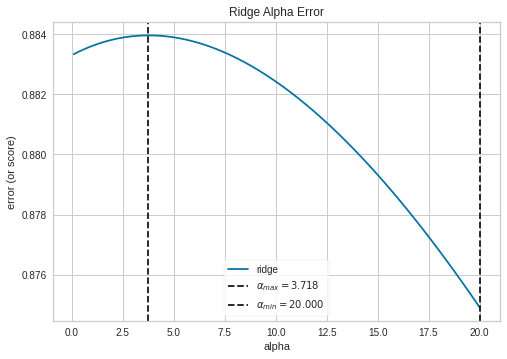

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [129]:
# Now let's try to find the best alpha value using the yellowbrick module.

visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_values,
    cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [130]:
# Now let's try our model with the best possible alpha value.

ridge_model_3_7 = Ridge(3.718).fit(X_train, y_train)
y_pred_3_7 = ridge_model_3_7.predict(X_test)
eval_metrics(y_test, y_pred_3_7)

r2_score: 0.8592507702660475 
 mae: 1.3603721549351868 
 mse: 4.429299967968445 
 rmse: 2.1045902137871035


/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


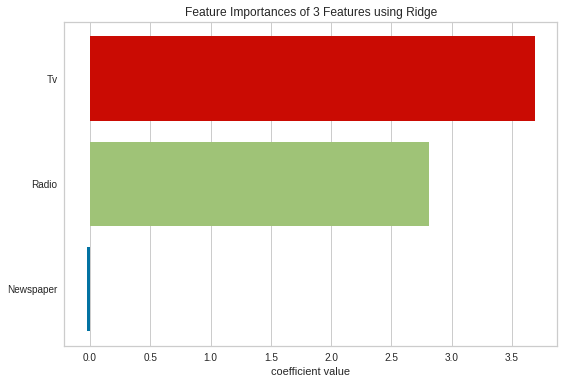

<AxesSubplot:title={'center':'Feature Importances of 3 Features using Ridge'}, xlabel='coefficient value'>

In [131]:
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model_3_7, labels=labels, relative=False)

viz.fit(X_train, y_train)
viz.show()

In [132]:
ridge_model_3_7.coef_

array([ 3.68964051,  2.81415442, -0.02596275])